# Introduction

File ini sebagai pembentuk model nuntuk membedakan apakah sebuah gambar termasuk gambar X-Ray atau bukan.

**Anggota Tim 5PSIA :**

| NPM | Nama |
| --- | --- |
| 2031016 | Jonathan|
| 2031140 | Marvin Christian|
| 2031119 | Henry|
| 2031160 | Nicky Nicholas|


# Import Data and Library

In [ ]:
# Import library yang dibutuhkan
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, DenseNet201, NASNetMobile
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from time import perf_counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Import utils gdown untuk download dataset
import gdown
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14840 sha256=df12ab4286a1770a4eb75285128242100a06182427ce37c94cea825bfed9725e
  Stored in directory: /tmp/pip-ephem-wheel-cache-lz23esxo/wheels/94/8d/0b/bdcd83555c3555f91a33f6c2384428d9f163c7d75ab0d272b4
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


## Notebook Specifications

In [ ]:
# Versi python
import sys
print(sys.version)

3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]


In [ ]:
# Struktur direktori
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         108G   23G   86G  21% /
tmpfs            64M     0   64M   0% /dev
shm             5.8G     0  5.8G   0% /dev/shm
/dev/root       2.0G  1.1G  910M  54% /sbin/docker-init
tmpfs           6.4G   32K  6.4G   1% /var/colab
/dev/sda1        41G   24G   17G  59% /etc/hosts
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [ ]:
# CPU Info
!cat /proc/cpuinfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass retbleed
bogomips	: 4499.99
TLB s

In [ ]:
# Memory Info
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         9296480 kB
MemAvailable:   11925428 kB
Buffers:           66312 kB
Cached:          2671716 kB
SwapCached:            0 kB
Active:           823824 kB
Inactive:        2952048 kB
Active(anon):        972 kB
Inactive(anon):   958284 kB
Active(file):     822852 kB
Inactive(file):  1993764 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2532 kB
Writeback:             0 kB
AnonPages:       1037892 kB
Mapped:           476680 kB
Shmem:              1260 kB
KReclaimable:     107568 kB
Slab:             138868 kB
SReclaimable:     107568 kB
SUnreclaim:        31300 kB
KernelStack:        4752 kB
PageTables:        19772 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    3160048 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        9588 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
# List of packages
import pip
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

## Downloading Data

Dataset dari kedua link berikut digabung dan diambil total hanya 2000 gambar.

https://www.kaggle.com/datasets/lprdosmil/unsplash-random-images-collection

https://www.kaggle.com/datasets/shamsaddin97/image-captioning-dataset-random-images


In [ ]:
# Download dataset ke dalam notebook
!gdown 1zAlV7SNSOaN4Gsxj07Ay_poAbCmYzyJ1

# Extract file hasil download 
!unzip random_image.zip

# Definisikan constant untuk PATH
PATH = 'random_image'

# Membuat direktori training : untuk data training
train_dir = os.path.join(PATH, 'train') #./random_image/train

# Membuat direktori validate : untuk mengukur akurasi saat training
validation_dir = os.path.join(PATH, 'val') #./random_image/val

# Membuat direktori testing : untuk testing pada dataset berbeda
test_dir = os.path.join(PATH, 'test') #./random_image/test


Streaming output truncated to the last 5000 lines.
  inflating: random_image/train/random/RANDOM_IMG_658.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_658.jpg  
  inflating: random_image/train/random/RANDOM_IMG_880.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_880.jpg  
  inflating: random_image/train/random/RANDOM_IMG_1739.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_1739.jpg  
  inflating: random_image/train/random/RANDOM_IMG_894.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_894.jpg  
  inflating: random_image/train/random/RANDOM_IMG_937.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_937.jpg  
  inflating: random_image/train/random/RANDOM_IMG_1856.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_1856.jpg  
  inflating: random_image/train/random/RANDOM_IMG_1842.jpg  
  inflating: __MACOSX/random_image/train/random/._RANDOM_IMG_1842.jpg  
  inflating: random_image/

## Data Exploration

In [ ]:
# Dapatkan total file di setiap kategori (training, validation, testing)
# Dapatkan total file training
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_train_random = len(os.listdir(os.path.join(train_dir, "random")))
total_train_xray = len(os.listdir(os.path.join(train_dir, "xray")))

# Dapatkan total file validation
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_val_random = len(os.listdir(os.path.join(validation_dir, "random")))
total_val_xray = len(os.listdir(os.path.join(validation_dir, "xray")))

# Dapatkan total file testing
total_test = sum([len(files) for r, d, files in os.walk(test_dir)])
total_test_random = len(os.listdir(os.path.join(test_dir, "random")))
total_test_xray = len(os.listdir(os.path.join(test_dir, "xray")))

In [ ]:
# Bentuk direktori
print(train_dir)
print(validation_dir)
print(test_dir)

random_image/train
random_image/val
random_image/test


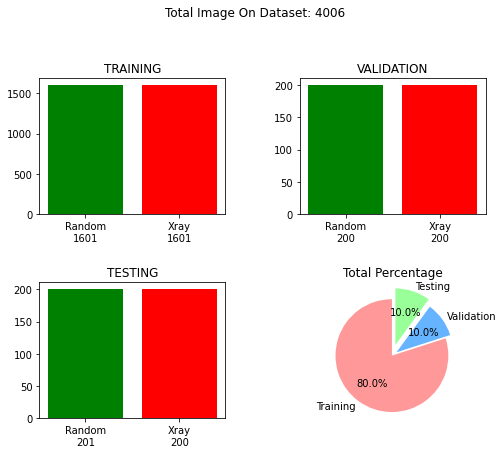

In [ ]:
dataset_categories = ["Training", "Validation", "Testing"]
image_labels = ["Random", "Xray"]
total_image = [
    [total_train_random, total_train_xray],
    [total_val_random, total_val_xray],
    [total_test_random, total_test_xray]
]

bar_color = ['green','red']

plt.figure(figsize = (8, 10))
plt.suptitle("Total Image On Dataset: " + str(total_train + total_val + total_test))

for n, category in enumerate(dataset_categories):
  image_labels = ["Random\n" + str(total_image[n][0]), "Xray\n" + str(total_image[n][1])]

  ax = plt.subplot(3, 2, n + 1)

  ax.bar(image_labels, total_image[n], color=bar_color)
  
  ax.set_title(category.upper())

# Pie chart
sizes = [total_train, total_val, total_test]
colors = ['#ff9999','#66b3ff','#99ff99']

ax = plt.subplot(3, 2, 4)
ax.pie(sizes, labels=dataset_categories, autopct='%1.1f%%', colors = colors, startangle=90, explode = (0, 0.1, 0.2))
ax.axis('equal')
ax.set_title("Total Percentage")

# Show
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

# Data Preparation

## Define Variable

In [ ]:
# Variables
INIT_LR = 1e-4 #0.0001
BATCH_SIZE = 128
EPOCHS = 20
IMG_HEIGHT = 224
IMG_WIDTH = 224

## Define Image Data Generator

In [ ]:
train_image_generator = ImageDataGenerator(
  rescale = 1./255 # Ubah nilai tensors 0 - 255 jadi antara 0 - 1
)

val_image_generator = ImageDataGenerator(
  rescale = 1./255 # Ubah nilai tensors 0 - 255 jadi antara 0 - 1
)

test_image_generator = ImageDataGenerator(
  rescale = 1./255 # Ubah nilai tensors 0 - 255 jadi antara 0 - 1
)

## Define Data Generator

In [ ]:
# Train Data Generator
train_data_gen = train_image_generator.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

# Validation Data Generator
val_data_gen = val_image_generator.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = validation_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

# Testing Data Generator
test_data_gen = test_image_generator.flow_from_directory(
    batch_size = 1,
    directory = test_dir,
    shuffle = False, # Bisa true jika mau (False agar mudah dibaca saat plotting)
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = "binary"
)

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
class_labels = list(train_data_gen.class_indices.keys())
class_labels

['random', 'xray']

## Define Image Plotting Function

In [ ]:
def plotImages(images_arr, images_label = [], probabilities = False, n_column = 1):
    images_arr_length = len(images_arr)

    figure_height = int(np.ceil(images_arr_length / n_column))
    figure_width = n_column

    fig, axes = plt.subplots (
        figure_height, 
        figure_width,
        figsize=(
            3 * n_column, # WIDTH
            images_arr_length * 3 / n_column + (0 if probabilities is False else 5) # HEIGHT
          )
       )
    
    axes = axes.flat if n_column > 1 else axes

    if probabilities is False:
      for img, lbl, ax in zip( images_arr, images_label, axes):
          ax.imshow(img)
          ax.axis('off')
          if lbl == 0:
            ax.set_title("Random Image")
          else:
            ax.set_title("X-ray Image")
    else:
      for img, lbl, probability, ax in zip( images_arr, images_label, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')

          actual_label = "Random" if lbl == 0 else "X-ray"

          # If peluang lebih dari 50%, maka x-ray
          if probability > 0.5:
              ax.set_title("Pred %.2f" % (probability*100) + "% X-ray, \nActual " + actual_label)
          else:
              ax.set_title("Pred %.2f" % ((1 - probability)*100) + "% Random, \nActual " + actual_label)
    
    plt.show()

### Plot Training Images

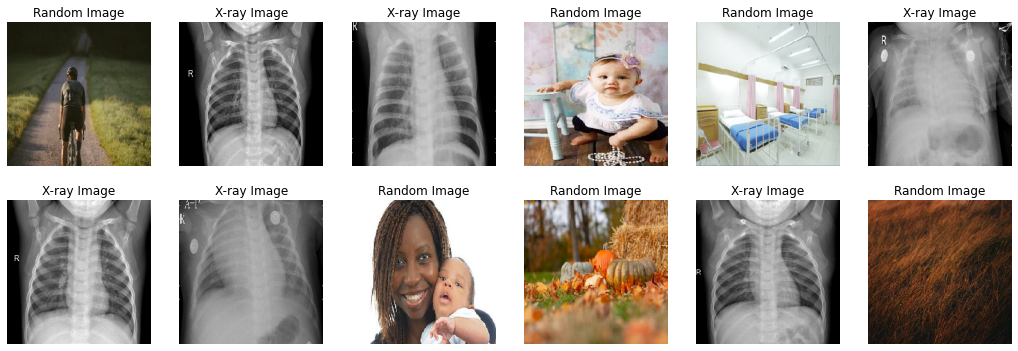

In [ ]:
sample_training_images, sample_training_labels = next(train_data_gen)

total = 12
plotImages(sample_training_images[:total], images_label = sample_training_labels[:total], n_column = 6)

### Plot Validation Images

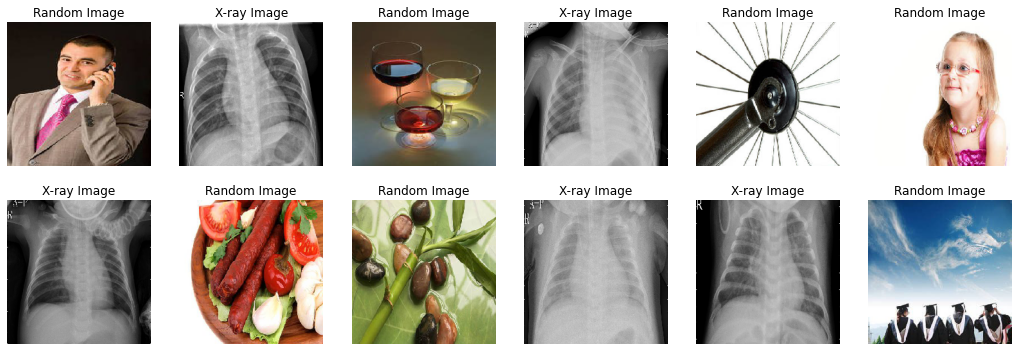

In [ ]:
# Plot validation images
sample_validation_images, sample_validation_labels = next(val_data_gen)

total = 12
plotImages(sample_validation_images[:total], sample_validation_labels[:total], n_column = 6)

## Define New Augmented Image Data Generator

In [ ]:
aug_train_image_generator = ImageDataGenerator(
    rescale=1./255,
   	rotation_range=20,
  	zoom_range=0.15,
  	width_shift_range=0.2,
  	height_shift_range=0.2,
  	shear_range=0.15,
  	horizontal_flip=True,
  	fill_mode="nearest",
		featurewise_center=True,
)

In [ ]:
aug_train_data_gen = aug_train_image_generator.flow_from_directory(
    batch_size = BATCH_SIZE,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    class_mode = 'binary'
)

Found 3200 images belonging to 2 classes.


### Plot Augmented Training Images

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


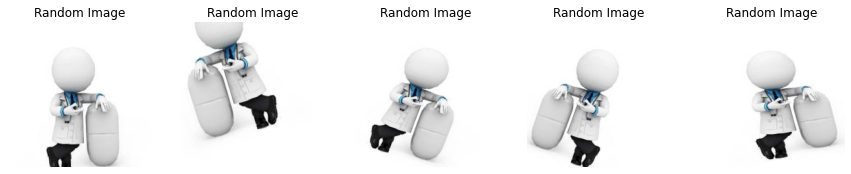

In [ ]:
# Variable
image_index = 0 # Maksimal adalah 
total_image_shown = 5

# Plot
plotImages(
  [aug_train_data_gen[image_index][0][0] for i in range(total_image_shown)], 
  [aug_train_data_gen.labels[image_index] for i in range(total_image_shown)], 
  n_column = total_image_shown
)

# Model

## Model Preparation

### Define Class Weight

In [ ]:
weight_for_random = total_train / (2 * total_train_random) 
weight_for_xray = total_train / (2 * total_train_xray)

class_weight = { 0: weight_for_random, 1: weight_for_xray }
class_weight

{0: 1.000312304809494, 1: 1.000312304809494}

### Define Dictionary of Models

Melalui training sebelumnya, ditemukan 3 **pre-trained model** terbaik yang terdiri dari:
1. DenseNet201
2. MobileNetV2
3. NASNetMobile

Maka dengan ini, tim juga memutuskan untuk membandingkan ke 3 model tersebut agar menemukan yang terbaik di antara mereka.

In [ ]:
dict_of_models = {
    "DenseNet201" : {"model" : DenseNet201, "performance_counter": 0 },
    "MobileNetV2" : {"model" : MobileNetV2, "performance_counter": 0 },
    "NASNetMobile" : {"model" : NASNetMobile, "performance_counter": 0 }
}

### Generate Model
Untuk memudahkan adaptasi model yang bisa ditambahkan, tim membuat sebuah function yang bisa generate model berdasarkan input.

In [ ]:
def generate_model(model):
  kwargs = {
    'weights' : 'imagenet', # WEIGHTS YANG TELAH DI TRAIN
    'include_top' : False, # TIDAK PAKAI INPUT
    'input_shape' : (IMG_HEIGHT, IMG_WIDTH, 3) # IMAGE_HEIGHT, IMAGE_WIDTH, INPUT_CHANNELS (RGB)
  }

  base_model = model(
      **kwargs
  )
  base_model.trainable = False

  headModel = base_model.input
  headModel = base_model.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dropout(0.5)(headModel)
  headModel = Dense(1, activation="sigmoid")(headModel)

  model = Model(inputs=base_model.input, outputs=headModel)

  # Compile model dengan optimizer Adam
  opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
  model.compile(
      loss = "binary_crossentropy", 
      optimizer = opt,
      metrics = ["accuracy"]
  )

  return model

### Define Callbacks
Untuk melancarkan dan mengembangkan proses training, proses callback dibutuhkan

> A callback is an object that can perform actions at various stages of training (e.g. at the start or end of an epoch, before or after a single batch, etc). - [Tensorflow Keras Callbacks](https://keras.io/api/callbacks/)

Tim memutuskan untuk menggunakan tiga tipe metode callback:
1. **ModelCheckpoint**

Untuk menyimpan model dengan validation accuracy terbaik saat training berlangsung

2. **EarlyStopping**

Dengan 5 jenis model yang ditraining, untuk meminimalisir waktu penyelesaian dan resources, maka ini dibutuhkan untuk menghentikan proses training jika validation_loss tidak mengalami improvement (menjadi lebih rendah)

3. **ReduceLROnPlateau**

Untuk mengurangi learning rate jika tidak mendapatkan improvement pada validation accuracy.

In [ ]:
# Nambah callback list ke generate model yang terpisah
def generate_callback(name):
  model_path = name + "_train.h5"

  checkpoint = ModelCheckpoint(
      model_path, 
      monitor = 'val_accuracy', 
      verbose = 1, 
      save_best_only = True,
      mode='max'
  )

  earlystopping = EarlyStopping(
      monitor = 'val_loss',
      patience = 5,
      restore_best_weights = True
  )

  learning_rate_reduction = ReduceLROnPlateau(
      monitor='val_accuracy', 
      patience = 3, 
      verbose = 1,
      factor = 0.3, 
      min_lr = 0.000001
  )

  return [checkpoint, earlystopping, learning_rate_reduction]

## Model Prediction

In [ ]:
for name, model in dict_of_models.items():
  
  # Ambil model
  tl_model = generate_model(model["model"])
  dict_of_models[name]["model"] = tl_model

  perf_counter_start = perf_counter()

  # Ambil callback
  callbacks_list = generate_callback(name)

  # Training modelnya
  print("\nStart Fitting ", str(name))

  History = tl_model.fit(
      aug_train_data_gen, 
      epochs = EPOCHS,
      steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))), 
      validation_data = val_data_gen,
      validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))),
      callbacks = callbacks_list,
      class_weight = class_weight
  )

  # Simpan all information yang ada
  # Simpan waktu
  total_time = round(perf_counter() - perf_counter_start, 2)
  dict_of_models[name]['performance_counter'] = total_time

  # Simpan akurasi
  train_acc = History.history['accuracy']
  dict_of_models[name]['train_acc'] = train_acc

  val_acc = History.history['val_accuracy']
  dict_of_models[name]['val_acc'] = val_acc

  # Simpan loss
  train_loss = History.history['loss']
  dict_of_models[name]['train_loss'] = train_loss

  val_loss = History.history['val_loss']
  dict_of_models[name]['val_loss'] = val_loss

  print("Total Duration", str(total_time))
  print("Latest Training Accuracy", str(dict_of_models[name]['train_acc'][-1]))
  print("Latest Training Loss", str(dict_of_models[name]['train_loss'][-1]))
  print("Latest Validation Accuracy", str(dict_of_models[name]['val_acc'][-1]))
  print("Latest Validation Loss", str(dict_of_models[name]['val_loss'][-1]))

74836368/74836368 [==============================] - 0s 0us/step

Start Fitting  DenseNet201
Epoch 1/20
25/26 [===========================>..] - ETA: 19s - loss: 0.5041 - accuracy: 0.7497


Epoch 1: val_accuracy improved from -inf to 0.99250, saving model to DenseNet201_train.h5
26/26 [==============================] - 554s 21s/step - loss: 0.5041 - accuracy: 0.7497 - val_loss: 0.1451 - val_accuracy: 0.9925 - lr: 1.0000e-04
Total Duration 573.01
Latest Training Accuracy 0.7496874928474426
Latest Training Loss 0.5041018128395081
Latest Validation Accuracy 0.9925000071525574
Latest Validation Loss 0.14510636031627655
9406464/9406464 [==============================] - 0s 0us/step

Start Fitting  MobileNetV2
Epoch 1/20
25/26 [===========================>..] - ETA: 3s - loss: 0.3246 - accuracy: 0.8612


Epoch 1: val_accuracy improved from -inf to 0.99500, saving model to MobileNetV2_train.h5
26/26 [==============================] - 108s 4s/step - loss: 0.3246 - accuracy: 0.8612 - val_loss: 0.0645 - val_accuracy: 0.9950 - lr: 1.0000e-04
Total Duration 146.68
Latest Training Accuracy 0.8612499833106995
Latest Training Loss 0.324564129114151
Latest Validation Accuracy 0.9950000047683716
Latest Validation Loss 0.06452244520187378
19993432/19993432 [==============================] - 0s 0us/step

Start Fitting  NASNetMobile
Epoch 1/20
25/26 [===========================>..] - ETA: 7s - loss: 0.4609 - accuracy: 0.7966 


Epoch 1: val_accuracy improved from -inf to 0.99500, saving model to NASNetMobile_train.h5
26/26 [==============================] - 219s 8s/step - loss: 0.4609 - accuracy: 0.7966 - val_loss: 0.1918 - val_accuracy: 0.9950 - lr: 1.0000e-04
Total Duration 275.99
Latest Training Accuracy 0.7965624928474426
Latest Training Loss 0.46085673570632935
Latest Validation Accuracy 0.9950000047683716
Latest Validation Loss 0.19179779291152954


### Plotting Training Result

#### Define Plotting Function

In [ ]:
def plot_accuracy_history(models):
  fig, axes = plt.subplots (
      len(dict_of_models), #ROW
      1, #COLUMN
      figsize=(
          7, # WIDTH
          5 * len(dict_of_models) #HEIGHT
        )
      )
  
  axes = axes.flat if len(dict_of_models) > 1 else [axes]

  for ax, name in zip(axes, dict_of_models.keys()):
    acc = dict_of_models[name]['train_acc']
    val_acc = dict_of_models[name]['val_acc']

    epochs_range = range(len(acc))

    ax.plot(epochs_range, acc, label='Training Accuracy')
    ax.plot(epochs_range, val_acc, label='Validation Accuracy')
    ax.legend(loc='lower right')
    ax.set_title(name + ' Training and Validation Accuracy')

  plt.suptitle("Training and Validation Accuracy", fontsize=20)
  fig.tight_layout()
  fig.subplots_adjust(top= 0.025 * len(dict_of_models) + 0.825)
  plt.show()

In [ ]:
def plot_loss_history(models):
  fig, axes = plt.subplots (
      len(dict_of_models), #ROW
      1, #COLUMN
      figsize=(
          7, # WIDTH
          5 * len(dict_of_models) #HEIGHT
        )
      )

  axes = axes.flat if len(dict_of_models) > 1 else [axes]

  for ax, name in zip(axes, dict_of_models.keys()):
    loss = dict_of_models[name]['train_loss']
    val_loss = dict_of_models[name]['val_loss']

    epochs_range = range(len(loss))

    ax.plot(epochs_range, loss, label='Training Loss')
    ax.plot(epochs_range, val_loss, label='Validation Loss')
    ax.legend(loc='upper right')
    ax.set_title(name + ' Training and Validation Loss')

  plt.suptitle("Training and Validation Loss", fontsize=20)
  fig.tight_layout()
  fig.subplots_adjust(top= 0.025 * len(dict_of_models) + 0.825)
  plt.show()

#### Plot Results

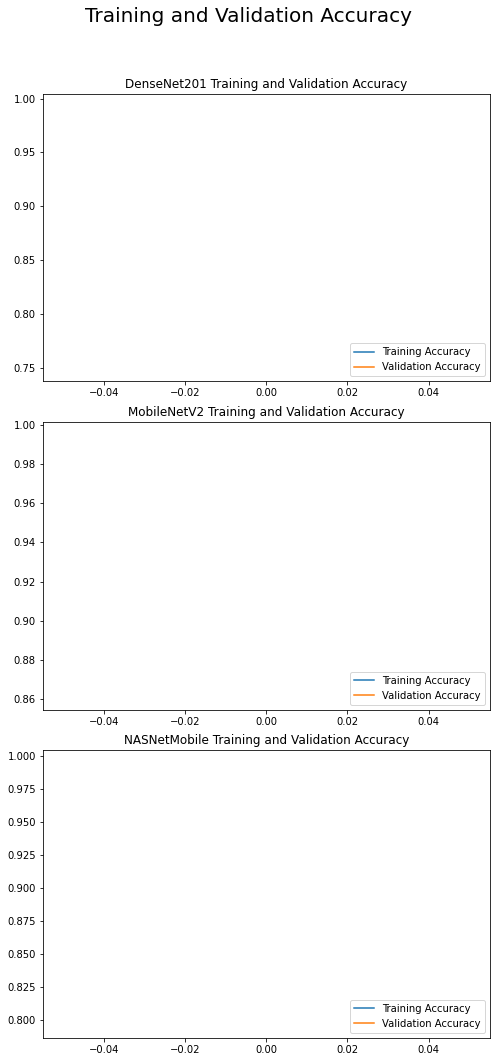

In [ ]:
plot_accuracy_history(dict_of_models)

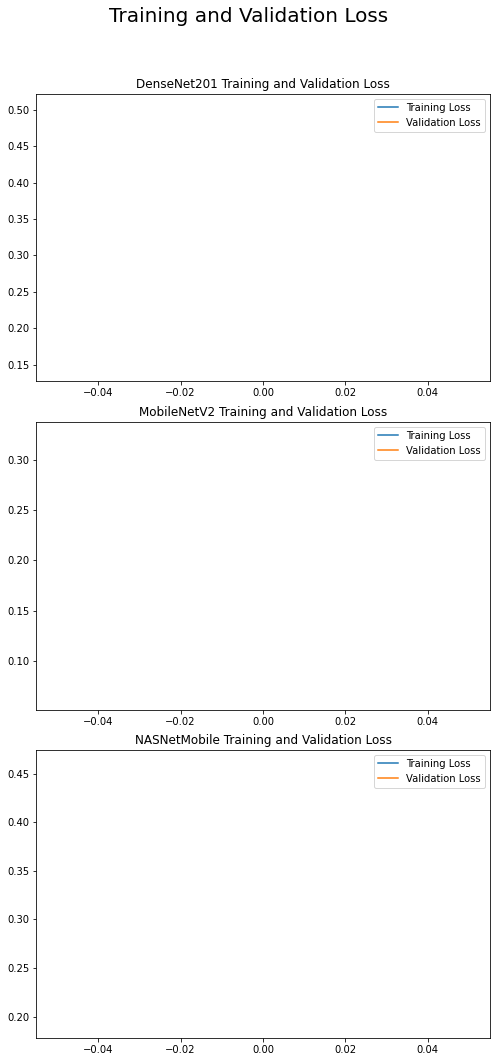

In [ ]:
plot_loss_history(dict_of_models)

# Output

## Predict Test Set

In [ ]:
for name, model in dict_of_models.items():
  # Probabilities
  probabilities = model["model"].predict(test_data_gen)
  dict_of_models[name]['probabilities'] = probabilities
  
  # Predicted Labels
  predicted_labels = np.where(probabilities > 0.5, 1, 0)
  dict_of_models[name]['predicted_labels'] = predicted_labels.ravel()

  # Classification report dari hasil prediksi
  pred_classification_report = (classification_report(test_data_gen.labels, predicted_labels, target_names=test_data_gen.class_indices.keys()))
  dict_of_models[name]['pred_classification_report'] = pred_classification_report

  # Confusion Matrix dari hasil prediksi
  cm = confusion_matrix(test_data_gen.labels, predicted_labels>0.5)
  dict_of_models[name]['confusion_matrix'] = cm

400/400 [==============================] - 35s 77ms/step


### Confusion Matrix

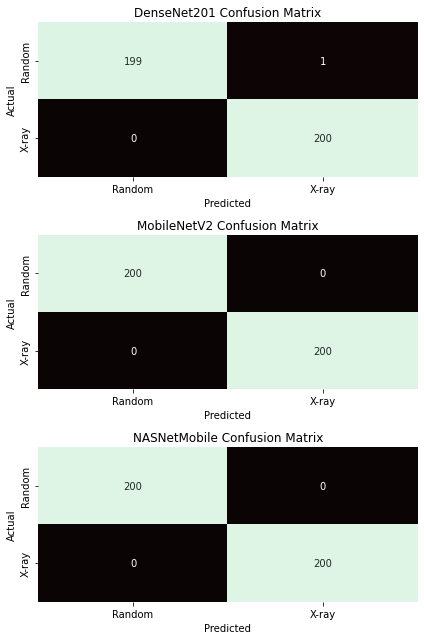

In [ ]:
fig, axes = plt.subplots(
    len(dict_of_models), # ROW
    1, # COLUMN
    figsize = (6, 3 * len(dict_of_models))
    )

axes = axes.flat if len(dict_of_models) > 1 else [axes]

for ax, name in zip(axes, dict_of_models.keys()):
  cm = dict_of_models[name]['confusion_matrix']

  sns.heatmap(cm, ax = ax, annot=True, fmt='g', vmin=0, cmap='mako', cbar=False)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_xticklabels(['Random', 'X-ray'])
  ax.set_yticklabels(['Random', 'X-ray'])
  ax.set_title(name + " Confusion Matrix")

fig.set_tight_layout(True)
plt.show()

### Classification Report

In [ ]:
for name in dict_of_models.keys():
  print(name, "Classification Report")
  print(dict_of_models[name]["pred_classification_report"] + "\n")

DenseNet201 Classification Report
              precision    recall  f1-score   support

      random       1.00      0.99      1.00       200
        xray       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


MobileNetV2 Classification Report
              precision    recall  f1-score   support

      random       1.00      1.00      1.00       200
        xray       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


NASNetMobile Classification Report
              precision    recall  f1-score   support

      random       1.00      1.00      1.00       200
        xray       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00

## Serialization / Save Final Model

In [ ]:
# Serialisasi / Simpan model dalam bentuk file
for name, model in dict_of_models.items():
  model["model"].save(name + "_detect_xray.model", save_format="h5")